In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import bayesflow as bf

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [8]:
def update(position, drift_vector, diffusion_strength, dt, angle, angular_velocity):
    """
    Perform a single time step update for the drift diffusion process, including rotational component.

    Parameters:
    position (numpy array): Current position of the particle.
    drift_vector (numpy array): The drift component in x and y directions.
    diffusion_strength (float): The strength of the diffusion component.
    dt (float): Time step for the simulation.
    angle (float): Current angle of the particle in radians.
    angular_velocity (float): The rate of change of angle in radians per unit time.

    Returns:
    tuple: Updated position of the particle and updated angle after a single time step.
    """
    # Generate random noise for diffusion
    noise = np.random.normal(0, np.sqrt(dt) * diffusion_strength, size=2)
    
    # Update angle with angular velocity
    angle += angular_velocity * dt
    
    # Calculate new drift vector based on rotation
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    rotated_drift_vector = rotation_matrix @ drift_vector
    
    # Update position with rotated drift and diffusion
    position += rotated_drift_vector * dt + noise
    return position, angle

In [12]:
def simulate_drift_diffusion(
        num_agents=5, 
        drift_vector=np.array([0.05, 0.05]), 
        diffusion_strength=0.1, 
        boundary_point=np.array([1.0, 1.0]), 
        start_points=None, 
        dt=0.01, 
        num_steps=5000, 
        angular_velocity=0.1
):
    """
    Simulate a 2D drift diffusion process with rotational component for multiple agents.

    Parameters:
    num_agents (int): Number of agents to simulate.
    drift_vector (numpy array): The drift component in x and y directions.
    diffusion_strength (float): The strength of the diffusion component.
    boundary_point (numpy array): The point representing the decision boundary in 2D space.
    start_points (list of numpy arrays): The starting points of the agents.
    dt (float): Time step for the simulation.
    num_steps (int): Maximum number of steps for the simulation.
    angular_velocity (float): The rate of change of angle in radians per unit time.

    Returns:
    list of numpy arrays: The trajectories of all agents as a list of 2D coordinate arrays.
    """
    # Initialize positions and angles for all agents
    if start_points is None:
        start_points = [np.array([0.0, 0.0]) for _ in range(num_agents)]
    positions = [start.copy() for start in start_points]
    angles = [0.0 for _ in range(num_agents)]
    trajectories = [[pos.copy()] for pos in positions]
    
    # Simulation loop
    for step in range(num_steps):
        for i in range(num_agents):
            # Perform a single time step update for each agent
            positions[i], angles[i] = update(positions[i], drift_vector, diffusion_strength, dt, angles[i], angular_velocity)
            trajectories[i].append(positions[i].copy())
            
            # Check if agent has reached the decision boundary
            if np.linalg.norm(positions[i] - boundary_point) < 0.1:
                print(f"Agent {i} reached boundary at step {step}")
                break

    # Convert trajectories to numpy arrays
    trajectories = [np.array(traj) for traj in trajectories]
    return trajectories

In [19]:
def animate_trajectories(trajectories, boundary_point):
    """
    Create an animation of the agents' trajectories.

    Parameters:
    trajectories (list of numpy arrays): The trajectories of all agents as a list of 2D coordinate arrays.
    boundary_point (numpy array): The point representing the decision boundary in 2D space.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_title('2D Drift Diffusion Model with Rotation for Multiple Agents (Animation)')
    ax.grid()
    ax.scatter(*boundary_point, color='red', label='Decision Boundary', s=100)
    scatters = [ax.plot([], [], 'o', label=f'Agent {i}')[0] for i in range(len(trajectories))]
    ax.legend()

    def init():
        for scatter in scatters:
            scatter.set_data([], [])
        return scatters

    def update(frame):
        for i, scatter in enumerate(scatters):
            if frame < len(trajectories[i]):
                scatter.set_data(trajectories[i][frame, 0], trajectories[i][frame, 1])
        return scatters

    animation = FuncAnimation(fig, update, frames=len(trajectories[0]), init_func=init, blit=True, repeat=False)
    return HTML(animation.to_jshtml())

Agent 1 reached boundary at step 1254
Agent 1 reached boundary at step 1255
Agent 1 reached boundary at step 1257
Agent 1 reached boundary at step 1258
Agent 1 reached boundary at step 1259
Agent 1 reached boundary at step 1260
Agent 1 reached boundary at step 1261
Agent 1 reached boundary at step 1262
Agent 1 reached boundary at step 1263
Agent 1 reached boundary at step 1264
Agent 1 reached boundary at step 1265
Agent 1 reached boundary at step 1266
Agent 1 reached boundary at step 1267
Agent 1 reached boundary at step 1268
Agent 1 reached boundary at step 1269
Agent 1 reached boundary at step 1270
Agent 1 reached boundary at step 1271
Agent 1 reached boundary at step 1272
Agent 1 reached boundary at step 1273
Agent 1 reached boundary at step 1274
Agent 1 reached boundary at step 1275
Agent 1 reached boundary at step 1276
Agent 1 reached boundary at step 1277
Agent 1 reached boundary at step 1278
Agent 1 reached boundary at step 1279
Agent 1 reached boundary at step 1280
Agent 1 reac

RuntimeError: x must be a sequence

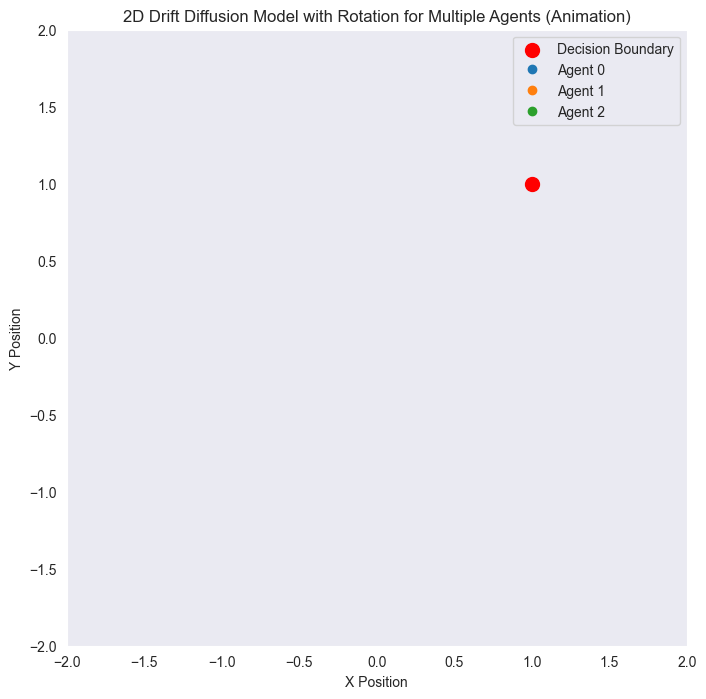

In [21]:
# Example usage
num_agents = 3
start_points = [np.array([0.0, 0.0]), np.array([0.5, 0.5]), np.array([-0.5, -0.5])]
trajectories = simulate_drift_diffusion(num_agents=num_agents, start_points=start_points)

a = animate_trajectories(trajectories, boundary_point=np.array([1.0, 1.0]))